In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv') 

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


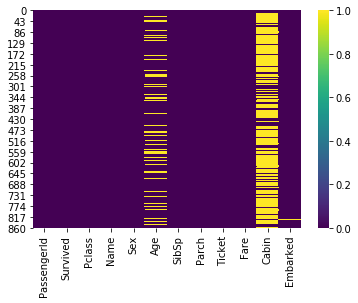

In [7]:
sns.heatmap(train.isnull(),cmap='viridis')

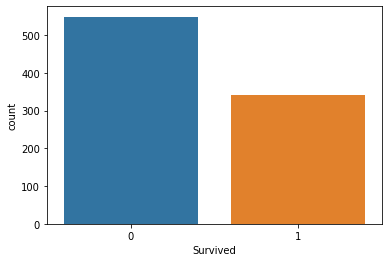

In [9]:
sns.countplot(x='Survived',data=train)

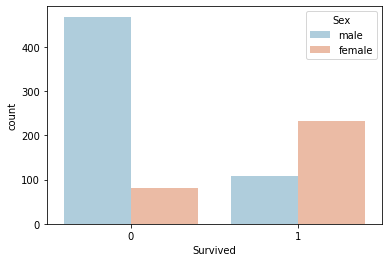

In [11]:
sns.countplot(x='Survived' , hue='Sex',data=train,palette='RdBu_r')

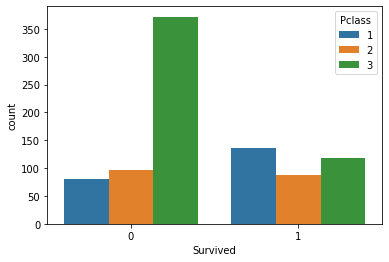

In [12]:
sns.countplot(x='Survived', hue='Pclass',data=train)

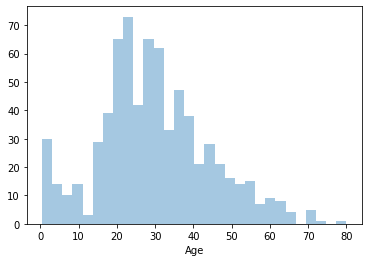

In [16]:
sns.distplot(train['Age'].dropna(),bins=30,kde=False)

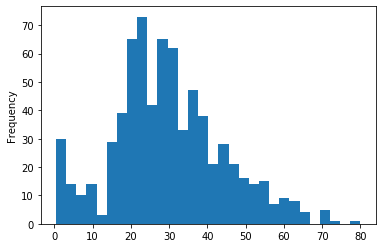

In [18]:
train['Age'].plot.hist(bins=30)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


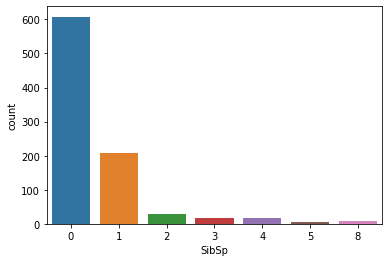

In [23]:
sns.countplot(x='SibSp', data=train)

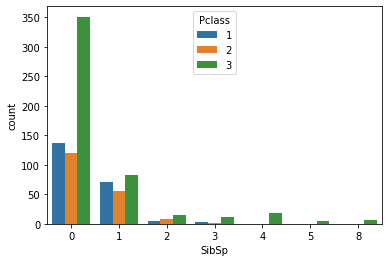

In [24]:
sns.countplot(x='SibSp', data=train,hue='Pclass')


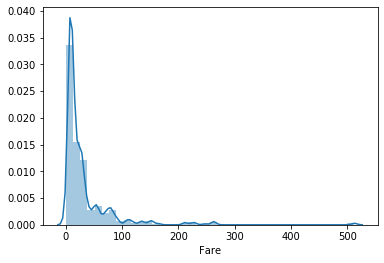

In [33]:
sns.distplot(train['Fare'],bins=40)

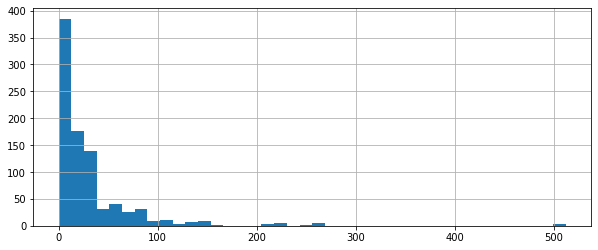

In [34]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [36]:
import cufflinks as cf

ModuleNotFoundError: No module named 'cufflinks'

In [37]:
cf.go_offline()

NameError: name 'cf' is not defined

In [38]:
train['Fare'].iplot(kind='hist',bins=50)

AttributeError: 'Series' object has no attribute 'iplot'

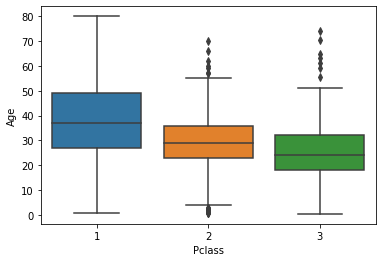

In [39]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [42]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [45]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

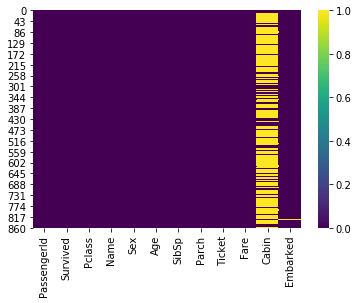

In [47]:
sns.heatmap(train.isnull(),cmap='viridis')

In [56]:
train.drop('Cabin',axis=1,inplace=True)

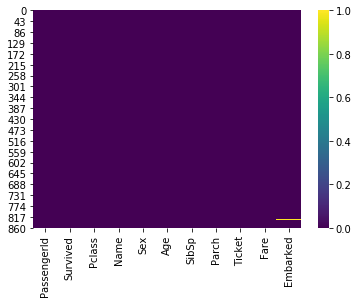

In [57]:
sns.heatmap(train.isnull(),cmap='viridis')

In [58]:
train.dropna(inplace=True)

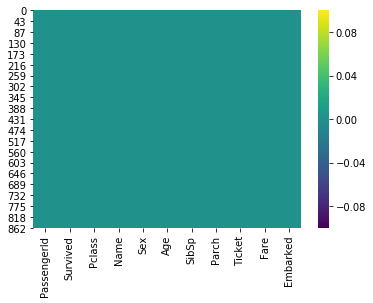

In [59]:
sns.heatmap(train.isnull(),cmap='viridis')

In [60]:
 pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [61]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [62]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [63]:
 embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [64]:
train  = pd.concat([train,sex,embark],axis=1)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,38,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S,1,0,1


In [67]:
  train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,38,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


In [69]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [70]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,24,0,0,7.9250,0,0,1
3,1,1,38,1,0,53.1000,0,0,1
4,0,3,24,0,0,8.0500,1,0,1


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = train.drop('Survived',axis =1)
y= train['Survived']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression()

In [86]:
logmodel.fit(X_train,y_train)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
prediction = logmodel.predict(X_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
print(confusion_matrix(y_test,prediction))

[[152  11]
 [ 36  68]]


In [90]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       163
           1       0.86      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.83      0.82      0.82       267

